## YouTube Subscriber Count Prediction

Given *data about Data Every Day Youtube videos*, let's try to predict the **number of subscribers** that will be generated from a given video.

We will use a random forest regression model to make our predictions.

Data Source: https://www.kaggle.com/datasets/gcdatkin/data-every-day-youtube-episodes

### Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('youtube_data.csv')
data.head()

,Video,Video title,Video publish time,End screen element clicks,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Likes,Average percentage viewed (%),Average view duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
0,7E7tl6rm7VM,100% Accuracy Mushroom Classification - Data E...,23-Aug-20,5,8,36,98.0,1,49,19.96,0:03:17,1429,78.3655,11.0,10910,8.67
1,-46XflOZewg,Bike Share Usage Prediction - Data Every Day #230,28-Mar-21,2,4,1,100.0,0,10,17.55,0:03:31,88,5.1650,0.0,1601,3.37
2,1OHk8urt60A,Tic-Tac-Toe Winner Classification - Data Every...,28-Dec-20,2,3,4,100.0,0,10,17.03,0:04:13,108,7.5958,0.0,2251,2.04
3,4lnUUZxeGBI,Health Insurance Interest Prediction - Data Ev...,17-Sep-20,2,3,6,100.0,0,6,16.01,0:04:21,297,21.5845,5.0,2674,6.28
4,9AnCNBL8c6Q,Age Prediction From Facial Images (CNN Regress...,27-Feb-21,2,5,3,100.0,0,14,20.11,0:04:53,266,21.6983,2.0,3014,5.14


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Video                               249 non-null    object 
 1   Video title                         249 non-null    object 
 2   Video publish time                  249 non-null    object 
 3   End screen element clicks           249 non-null    int64  
 4   Comments added                      249 non-null    int64  
 5   Shares                              249 non-null    int64  
 6   Likes (vs. dislikes) (%)            249 non-null    float64
 7   Dislikes                            249 non-null    int64  
 8   Likes                               249 non-null    int64  
 9   Average percentage viewed (%)       249 non-null    float64
 10  Average view duration               249 non-null    object 
 11  Views                               249 non-n

### Preprocessing

In [4]:
df = data.copy()

In [5]:
# Drop unused columns
df = df.drop(['Video', 'Video title'], axis=1)
df

,Video publish time,End screen element clicks,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Likes,Average percentage viewed (%),Average view duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
0,23-Aug-20,5,8,36,98.0,1,49,19.96,0:03:17,1429,78.3655,11.0,10910,8.67
1,28-Mar-21,2,4,1,100.0,0,10,17.55,0:03:31,88,5.1650,0.0,1601,3.37
2,28-Dec-20,2,3,4,100.0,0,10,17.03,0:04:13,108,7.5958,0.0,2251,2.04
3,17-Sep-20,2,3,6,100.0,0,6,16.01,0:04:21,297,21.5845,5.0,2674,6.28
4,27-Feb-21,2,5,3,100.0,0,14,20.11,0:04:53,266,21.6983,2.0,3014,5.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,22-Jan-21,0,0,4,100.0,0,5,12.53,0:06:09,146,14.9656,3.0,2146,3.22
245,6-Nov-20,0,3,0,100.0,0,2,16.32,0:04:25,58,4.2834,3.0,1693,1.83
246,14-Dec-20,0,3,7,100.0,0,13,12.60,0:04:58,251,20.8134,2.0,5775,2.37
247,26-Aug-20,0,2,5,100.0,0,12,14.26,0:03:27,263,15.1233,4.0,3298,5.12


In [6]:
df.isna().sum()

Video publish time                    0
End screen element clicks             0
Comments added                        0
Shares                                0
Likes (vs. dislikes) (%)              0
Dislikes                              0
Likes                                 0
Average percentage viewed (%)         0
Average view duration                 0
Views                                 0
Watch time (hours)                    0
Subscribers                           1
Impressions                           0
Impressions click-through rate (%)    0
dtype: int64

In [7]:
df[df['Subscribers'].isna()].index

Index([125], dtype='int64')

In [8]:
# Drop row with missing target value
missing_target_row = df[df['Subscribers'].isna()].index
df = df.drop(missing_target_row, axis=0).reset_index(drop=True)

In [9]:
# Extract date features
df['Video publish time'] = pd.to_datetime(df['Video publish time'])
df['Video month'] = df['Video publish time'].apply(lambda x: x.month)
df['Video day'] = df['Video publish time'].apply(lambda x: x.day)
df = df.drop('Video publish time', axis=1)

/tmp/ipykernel_33235/282046456.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Video publish time'] = pd.to_datetime(df['Video publish time'])


In [10]:
df

,End screen element clicks,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Likes,Average percentage viewed (%),Average view duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Video month,Video day
0,5,8,36,98.0,1,49,19.96,0:03:17,1429,78.3655,11.0,10910,8.67,8,23
1,2,4,1,100.0,0,10,17.55,0:03:31,88,5.1650,0.0,1601,3.37,3,28
2,2,3,4,100.0,0,10,17.03,0:04:13,108,7.5958,0.0,2251,2.04,12,28
3,2,3,6,100.0,0,6,16.01,0:04:21,297,21.5845,5.0,2674,6.28,9,17
4,2,5,3,100.0,0,14,20.11,0:04:53,266,21.6983,2.0,3014,5.14,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0,0,4,100.0,0,5,12.53,0:06:09,146,14.9656,3.0,2146,3.22,1,22
244,0,3,0,100.0,0,2,16.32,0:04:25,58,4.2834,3.0,1693,1.83,11,6
245,0,3,7,100.0,0,13,12.60,0:04:58,251,20.8134,2.0,5775,2.37,12,14
246,0,2,5,100.0,0,12,14.26,0:03:27,263,15.1233,4.0,3298,5.12,8,26


In [11]:
df.dtypes

End screen element clicks               int64
Comments added                          int64
Shares                                  int64
Likes (vs. dislikes) (%)              float64
Dislikes                                int64
Likes                                   int64
Average percentage viewed (%)         float64
Average view duration                  object
Views                                   int64
Watch time (hours)                    float64
Subscribers                           float64
Impressions                             int64
Impressions click-through rate (%)    float64
Video month                             int64
Video day                               int64
dtype: object

In [12]:
# Convert durations to seconds
df['Average view duration'] = pd.to_datetime(df['Average view duration']).apply(lambda x: (x.minute) * 60 + x.second)

/tmp/ipykernel_33235/2884596140.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Average view duration'] = pd.to_datetime(df['Average view duration']).apply(lambda x: (x.minute) * 60 + x.second)


In [13]:
df

,End screen element clicks,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Likes,Average percentage viewed (%),Average view duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Video month,Video day
0,5,8,36,98.0,1,49,19.96,197,1429,78.3655,11.0,10910,8.67,8,23
1,2,4,1,100.0,0,10,17.55,211,88,5.1650,0.0,1601,3.37,3,28
2,2,3,4,100.0,0,10,17.03,253,108,7.5958,0.0,2251,2.04,12,28
3,2,3,6,100.0,0,6,16.01,261,297,21.5845,5.0,2674,6.28,9,17
4,2,5,3,100.0,0,14,20.11,293,266,21.6983,2.0,3014,5.14,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0,0,4,100.0,0,5,12.53,369,146,14.9656,3.0,2146,3.22,1,22
244,0,3,0,100.0,0,2,16.32,265,58,4.2834,3.0,1693,1.83,11,6
245,0,3,7,100.0,0,13,12.60,298,251,20.8134,2.0,5775,2.37,12,14
246,0,2,5,100.0,0,12,14.26,207,263,15.1233,4.0,3298,5.12,8,26


In [14]:
# Split df into X and y
y = df['Subscribers']
X = df.drop('Subscribers', axis=1)

In [15]:
y

0      11.0
1       0.0
2       0.0
3       5.0
4       2.0
       ... 
243     3.0
244     3.0
245     2.0
246     4.0
247     3.0
Name: Subscribers, Length: 248, dtype: float64

In [16]:
X

,End screen element clicks,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Likes,Average percentage viewed (%),Average view duration,Views,Watch time (hours),Impressions,Impressions click-through rate (%),Video month,Video day
0,5,8,36,98.0,1,49,19.96,197,1429,78.3655,10910,8.67,8,23
1,2,4,1,100.0,0,10,17.55,211,88,5.1650,1601,3.37,3,28
2,2,3,4,100.0,0,10,17.03,253,108,7.5958,2251,2.04,12,28
3,2,3,6,100.0,0,6,16.01,261,297,21.5845,2674,6.28,9,17
4,2,5,3,100.0,0,14,20.11,293,266,21.6983,3014,5.14,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0,0,4,100.0,0,5,12.53,369,146,14.9656,2146,3.22,1,22
244,0,3,0,100.0,0,2,16.32,265,58,4.2834,1693,1.83,11,6
245,0,3,7,100.0,0,13,12.60,298,251,20.8134,5775,2.37,12,14
246,0,2,5,100.0,0,12,14.26,207,263,15.1233,3298,5.12,8,26


### Training/Validation

In [29]:
kf = KFold(n_splits=5)
for train_idx, test_idx in kf.split(X):
    print(test_idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
[150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198]
[199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247]


In [30]:
kf = KFold(n_splits=5)
rmses = []
r2s = []

for train_idx, test_idx in kf.split(X):
    X_train = X.iloc[train_idx, :]
    X_test = X.iloc[test_idx, :]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    rmses.append(rmse)

    r2 = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2)
    r2s.append(r2)

### Results

In [31]:
print("RMSE: {:.2f}".format(np.mean(rmses)))
print("R^2 Score: {:.5f}".format(np.mean(r2s)))

RMSE: 1.99
R^2 Score: 0.46565


<Axes: ylabel='Frequency'>

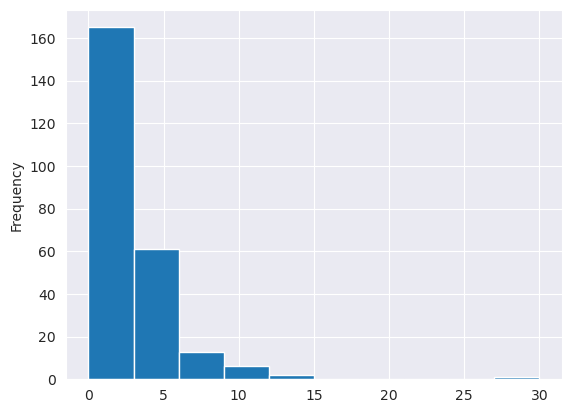

In [32]:
y.plot.hist()

In [33]:
y.describe()

count    248.000000
mean       2.254032
std        2.979686
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max       30.000000
Name: Subscribers, dtype: float64

In [34]:
rmses

[1.6161021007349754,
 1.3631925762708657,
 3.5337439069632652,
 1.5253410458394046,
 1.9204809134108858]

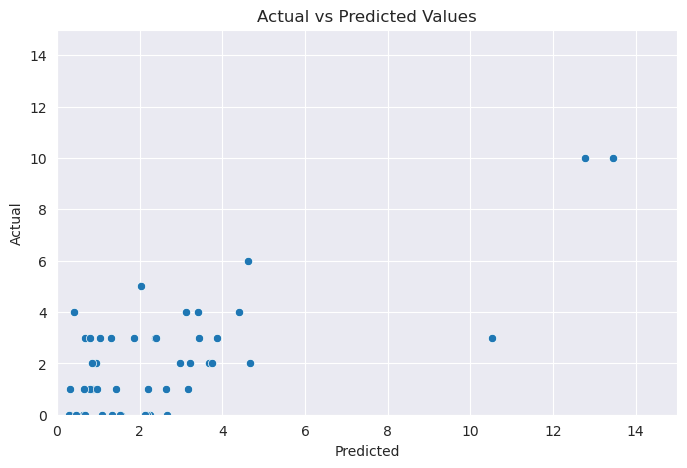

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.title("Actual vs Predicted Values")
plt.show()